# <font color=#003d5c>Análisis Exploratorio de Datos</font>

#### Importar la librerías necesarias para el tratamiento de datos

In [1]:
import pandas as pd
import numpy as np

#### Leer el fichero como un DataFrame

In [2]:
df = pd.read_csv('../data/DS_Churn_Banca_CLIENTE.csv') 

#### Dar una revisión inicial de los Datos. Imprimir los 5 primeros registros

In [3]:
df.head()

,ID_CORRELATIVO,CODMES,ATTRITION,SEXO,ESTADO_CIVIL,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,FLG_NOMINA,RANG_NRO_PRODUCTOS_MENOS0,SDO_ACTIVO_MENOS0,FLG_SEGURO_MENOS0,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL3_MENOS0,NRO_ENTID_SSFF_MENOS0,FLG_SDO_OTSSFF_MENOS0
0,11752,201208,0,F,Casado,1,Rang_ingreso_01,Provincia,36.0,0.0,Cero,0,Rango_01,0,0,0,0,0,2,1
1,98898,201208,0,F,Casado,0,Rang_ingreso_01,Lima,23.0,0.0,Rango_SDO_02,1,Rango_02,0,0,0,0,7,0,0
2,82206,201208,0,F,Casado,1,Rang_ingreso_02,Provincia,24.0,0.0,Rango_SDO_01,1,Rango_02,0,0,0,0,16,1,1
3,50435,201208,1,M,Casado,1,Rang_ingreso_01,Provincia,30.0,NaN,Cero,0,Rango_02,0,1,0,0,0,5,1
4,79004,201208,0,F,Casado,0,NaN,Provincia,30.0,0.0,Rango_SDO_10,0,Rango_02,0,0,0,0,1,0,0


#### Mostrar un resumen conciso del DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
ID_CORRELATIVO               10000 non-null int64
CODMES                       10000 non-null int64
ATTRITION                    10000 non-null int64
SEXO                         10000 non-null object
ESTADO_CIVIL                 9844 non-null object
FLG_BANCARIZADO              10000 non-null int64
RANG_INGRESO                 8656 non-null object
FLAG_LIMA_PROVINCIA          9530 non-null object
EDAD                         9257 non-null float64
ANTIGUEDAD                   9746 non-null float64
RANG_SDO_PASIVO_MENOS0       10000 non-null object
FLG_NOMINA                   10000 non-null int64
RANG_NRO_PRODUCTOS_MENOS0    10000 non-null object
SDO_ACTIVO_MENOS0            10000 non-null int64
FLG_SEGURO_MENOS0            10000 non-null int64
NRO_ACCES_CANAL1_MENOS0      10000 non-null int64
NRO_ACCES_CANAL2_MENOS0      10000 non-null int64
NRO_ACCES_CANAL3_MENOS0      10000 no

#### Diccionario de Datos

|ROL|NOMBRE DE VARIABLE|DESCRIPCIÓN|CORTE|
|------|------|
|ID|ID_CORRELATIVO|ID Cliente correlativo|mes 0 = mes de referencia|
|Partición|CODMES|Mes de referencia|mes 0|
|Predictora|FLG_BANCARIZADO|Flag Bancarizado (1) / no bancarizado (0)|mes 0|
|Predictora|RANG_INGRESO|Ingreso estimado: rangos de menor hasta mayor ingreso (rang_ingreso_01, rang_ingreso_02, etc)|mes 0|
|Predictora|FLAG_LIMA_PROVINCIA|Lugar de residencia: Lima (1), provincia (0)|mes 0|
|Predictora|EDAD|Edad|mes 0|
|Predictora|ANTIGÜEDAD|Antigüedad|mes 0|
|Target|ATTRITION|Flag Attrition / deserción de clientes: attrition (1), No cae en attrition (0)|variable target|
|Predictora|RANG_SDO_PASIVO|Saldo ahorros: rangos de menor a mayor monto (cero, rango_sdo_01, rango_sdo_02, etc)|mes 0|
|Predictora|SDO_ACTIVO|Saldo / deuda en créditos|mes -5 hasta 0 = últimos 6 meses|
|Predictora|FLG_SEGURO|Flag tiene algún seguro: tiene seguro (1), no tiene seguro (0)|mes -5 hasta 0|
|Predictora|NRO_PRODUCTOS|Número de productos con la entidad: rangos de menor a mayor cantidad de productos (rango_01, rango_02, etc)|mes 0|
|Predictora|FLG_NOMINA|Flag nómina: si (1), no (0)|mes 0|
|Predictora|NRO_ACCES_CANAL1|Nro de operaciones por el canal 1|mes -5 hasta 0|
|Predictora|NRO_ACCES_CANAL2|Nro de operaciones por el canal 2|mes -5 hasta 0|
|Predictora|NRO_ACCES_CANAL3|Nro de operaciones por el canal 3|mes -5 hasta 0|
|Predictora|NRO_ENTID_SSFF|Nro de entidades en el sistema financiero|mes -5 hasta 0|
|Predictora|FLG_SDO_OTSSFF|Flag tiene saldo en otras entidades del sistema financiero: tiene saldo (1), no tiene saldo (0)|mes -5 hasta 0|

#### ¿Podemos optimizar el espacio del DataFrame? Claro. Con las siguientes líneas de código:
```python
int_columns = df.select_dtypes(include=[np.int64])
for col in int_columns:
    df[col] = pd.to_numeric(arg=df[col], downcast='integer')

float_columns = df.select_dtypes(include=[np.float64])
for col in float_columns:
    df[col] = pd.to_numeric(arg=df[col], downcast='float')
```

In [5]:
int_columns = df.select_dtypes(include=[np.int64]).columns.tolist()
for col in int_columns:
    df[col] = pd.to_numeric(arg=df[col], downcast='integer')

float_columns = df.select_dtypes(include=[np.float64]).columns.tolist()
for col in float_columns:
    df[col] = pd.to_numeric(arg=df[col], downcast='float')

<div class="alert alert-warning" role="alert">
  <strong>Nota:</strong> Para las variables del tipo `Object` lo podemos hacer con el método `as_type()` que permite castear una columna del dataframe a un tipo de dato, en este caso el tipo `category`.
</div>

#### ¿Se redujo el espacio que ocupa el DataFrame?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
ID_CORRELATIVO               10000 non-null int32
CODMES                       10000 non-null int32
ATTRITION                    10000 non-null int8
SEXO                         10000 non-null object
ESTADO_CIVIL                 9844 non-null object
FLG_BANCARIZADO              10000 non-null int8
RANG_INGRESO                 8656 non-null object
FLAG_LIMA_PROVINCIA          9530 non-null object
EDAD                         9257 non-null float32
ANTIGUEDAD                   9746 non-null float32
RANG_SDO_PASIVO_MENOS0       10000 non-null object
FLG_NOMINA                   10000 non-null int8
RANG_NRO_PRODUCTOS_MENOS0    10000 non-null object
SDO_ACTIVO_MENOS0            10000 non-null int32
FLG_SEGURO_MENOS0            10000 non-null int8
NRO_ACCES_CANAL1_MENOS0      10000 non-null int8
NRO_ACCES_CANAL2_MENOS0      10000 non-null int8
NRO_ACCES_CANAL3_MENOS0      10000 non-null

#### Análisis Descriptivo de los datos

Mostrar las estadísticas descriptivas que resuman la tendencia central, la dispersión y la forma de la distribución los datos del DataFrame, excluyendo los valores NaN.

In [7]:
df.describe(percentiles=list(np.arange(0, 1, 0.1)), include='all')

,ID_CORRELATIVO,CODMES,ATTRITION,SEXO,ESTADO_CIVIL,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,FLG_NOMINA,RANG_NRO_PRODUCTOS_MENOS0,SDO_ACTIVO_MENOS0,FLG_SEGURO_MENOS0,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL3_MENOS0,NRO_ENTID_SSFF_MENOS0,FLG_SDO_OTSSFF_MENOS0
count,10000.000000,10000.0,10000.000000,10000,9844,10000.000000,8656,9530,9257.000000,9746.000000,10000,10000.000000,10000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,2,3,NaN,9,2,NaN,NaN,15,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,M,Soltero,NaN,Rang_ingreso_01,Lima,NaN,NaN,Rango_SDO_01,NaN,Rango_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,5733,7106,NaN,2196,5891,NaN,NaN,3894,NaN,5302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50460.092400,201208.0,0.155300,NaN,NaN,0.840000,NaN,NaN,35.261101,2.557767,NaN,0.383500,NaN,8.153705e+03,0.495700,1.022000,1.793200,5.515700,2.042100,0.538400
std,28980.502956,0.0,0.362209,NaN,NaN,0.366624,NaN,NaN,11.511391,3.212349,NaN,0.486263,NaN,6.881066e+04,0.500007,2.675151,4.515315,7.604021,1.950874,0.498548
min,4.000000,201208.0,0.000000,NaN,NaN,0.000000,NaN,NaN,18.000000,0.000000,NaN,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,4.000000,201208.0,0.000000,NaN,NaN,0.000000,NaN,NaN,18.000000,0.000000,NaN,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,9633.900000,201208.0,0.000000,NaN,NaN,0.000000,NaN,NaN,24.000000,0.000000,NaN,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,20115.200000,201208.0,0.000000,NaN,NaN,1.000000,NaN,NaN,26.000000,0.000000,NaN,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Imprimir las distribuciones de los datos del tipo numérico (int, float)

<div class="alert alert-info" role="alert">
  <strong>Nota:</strong> Primero identificar las variables numéricas. No se debe considerar las variables `['ID_CORRELATIVO', 'CODMES', 'ATTRITION']`. Para ello podemos utilizar uno de los conceptos de las listas llamado `List Comprehensions`.
</div>
```python
list_3 = [col for col in list_1 if col not in list_2]
```

In [8]:
numeric_columns = int_columns + float_columns
numeric_columns = [col for col in numeric_columns if col not in ['ID_CORRELATIVO', 'CODMES', 'ATTRITION']]

In [9]:
for col in numeric_columns:
    print("--------- {0} --------- \n".format(col))
    print(df[col].value_counts(bins=5, normalize=True, sort=False, dropna=False), '\n')

--------- FLG_BANCARIZADO --------- 

(-0.002, 0.2]    0.16
(0.2, 0.4]       0.00
(0.4, 0.6]       0.00
(0.6, 0.8]       0.00
(0.8, 1.0]       0.84
Name: FLG_BANCARIZADO, dtype: float64 

--------- FLG_NOMINA --------- 

(-0.002, 0.2]    0.6165
(0.2, 0.4]       0.0000
(0.4, 0.6]       0.0000
(0.6, 0.8]       0.0000
(0.8, 1.0]       0.3835
Name: FLG_NOMINA, dtype: float64 

--------- SDO_ACTIVO_MENOS0 --------- 

(-3275.751, 655150.0]     0.9980
(655150.0, 1310300.0]     0.0015
(1310300.0, 1965450.0]    0.0002
(1965450.0, 2620600.0]    0.0002
(2620600.0, 3275750.0]    0.0001
Name: SDO_ACTIVO_MENOS0, dtype: float64 

--------- FLG_SEGURO_MENOS0 --------- 

(-0.002, 0.2]    0.5043
(0.2, 0.4]       0.0000
(0.4, 0.6]       0.0000
(0.6, 0.8]       0.0000
(0.8, 1.0]       0.4957
Name: FLG_SEGURO_MENOS0, dtype: float64 

--------- NRO_ACCES_CANAL1_MENOS0 --------- 

(-0.029, 5.6]    0.9358
(5.6, 11.2]      0.0495
(11.2, 16.8]     0.0094
(16.8, 22.4]     0.0041
(22.4, 28.0]     0.0012
Name: NRO

#### Obtener los ratios de efectividad por rangos

In [10]:
df.groupby(pd.qcut(x=df['ANTIGUEDAD'], q=10, duplicates='drop')).agg({'ATTRITION': 'mean', 'ID_CORRELATIVO':'count'})

,ATTRITION,ID_CORRELATIVO
ANTIGUEDAD,,
"(-0.001, 2.0]",0.187489,5867
"(2.0, 4.0]",0.074169,1173
"(4.0, 6.0]",0.085271,1161
"(6.0, 8.0]",0.056720,811
"(8.0, 20.0]",0.051771,734


In [11]:
for col in float_columns:
    print("--------- {0} --------- \n".format(col))
    print(df.groupby(pd.qcut(x=df[col], q=10, duplicates='drop')).agg({'ATTRITION': 'mean', 'ID_CORRELATIVO':'count'}), '\n')

--------- EDAD --------- 

                ATTRITION  ID_CORRELATIVO
EDAD                                     
(17.999, 24.0]   0.179969            1278
(24.0, 26.0]     0.141176             935
(26.0, 28.0]     0.128232             967
(28.0, 30.0]     0.121027             818
(30.0, 32.0]     0.142091             746
(32.0, 35.0]     0.129196             983
(35.0, 39.0]     0.124236             982
(39.0, 44.0]     0.149635             822
(44.0, 52.0]     0.165049             824
(52.0, 90.0]     0.180710             902 

--------- ANTIGUEDAD --------- 

               ATTRITION  ID_CORRELATIVO
ANTIGUEDAD                              
(-0.001, 2.0]   0.187489            5867
(2.0, 4.0]      0.074169            1173
(4.0, 6.0]      0.085271            1161
(6.0, 8.0]      0.056720             811
(8.0, 20.0]     0.051771             734 



#### Imprimir las distribuciones de los datos del tipo categórico

In [12]:
str_columns = df.select_dtypes(include=[object]).columns.tolist()

In [13]:
for col in str_columns:
    print("--------- {0} --------- \n".format(col))
    print(df[col].value_counts(normalize=True, dropna=False), '\n')

--------- SEXO --------- 

M    0.5733
F    0.4267
Name: SEXO, dtype: float64 

--------- ESTADO_CIVIL --------- 

Soltero       0.7106
Casado        0.2104
Divorciado    0.0634
NaN           0.0156
Name: ESTADO_CIVIL, dtype: float64 

--------- RANG_INGRESO --------- 

Rang_ingreso_01    0.2196
Rang_ingreso_02    0.1889
Rang_ingreso_03    0.1442
NaN                0.1344
Rang_ingreso_04    0.1083
Rang_ingreso_06    0.0876
Rang_ingreso_05    0.0561
Rang_ingreso_07    0.0329
Rang_ingreso_09    0.0142
Rang_ingreso_08    0.0138
Name: RANG_INGRESO, dtype: float64 

--------- FLAG_LIMA_PROVINCIA --------- 

Lima         0.5891
Provincia    0.3639
NaN          0.0470
Name: FLAG_LIMA_PROVINCIA, dtype: float64 

--------- RANG_SDO_PASIVO_MENOS0 --------- 

Rango_SDO_01    0.3894
Cero            0.1869
Rango_SDO_02    0.1002
Rango_SDO_04    0.0634
Rango_SDO_03    0.0606
Rango_SDO_05    0.0379
Rango_SDO_06    0.0327
Rango_SDO_07    0.0308
Rango_SDO_08    0.0191
Rango_SDO_14    0.0184
Rango_SDO_1

#### Obtener los ratios de efectividad por categoría

In [14]:
for col in str_columns:
    print("--------- {0} --------- \n".format(col))
    print(df.groupby(col).agg({'ATTRITION': 'mean', 'ID_CORRELATIVO':'count'}), '\n')

--------- SEXO --------- 

      ATTRITION  ID_CORRELATIVO
SEXO                           
F      0.095383            4267
M      0.199895            5733 

--------- ESTADO_CIVIL --------- 

              ATTRITION  ID_CORRELATIVO
ESTADO_CIVIL                           
Casado         0.095532            2104
Divorciado     0.190852             634
Soltero        0.168731            7106 

--------- RANG_INGRESO --------- 

                 ATTRITION  ID_CORRELATIVO
RANG_INGRESO                              
Rang_ingreso_01   0.220401            2196
Rang_ingreso_02   0.187930            1889
Rang_ingreso_03   0.135922            1442
Rang_ingreso_04   0.084026            1083
Rang_ingreso_05   0.062389             561
Rang_ingreso_06   0.054795             876
Rang_ingreso_07   0.030395             329
Rang_ingreso_08   0.021739             138
Rang_ingreso_09   0.021127             142 

--------- FLAG_LIMA_PROVINCIA --------- 

                     ATTRITION  ID_CORRELATIVO
FLAG_LI

### <font color=#003d5c>Visualización de Datos</font>

#### Importar la primera librería necesaria para la visualización de datos:
### <font color=#003d5c>1. Matplotlib</font>
<img src="../img/matplotlib_logo.png" />

In [15]:
import matplotlib.pyplot as plt

<div class="alert alert-info" role="alert">
  <strong>Info:</strong> Para permitir que los gráficos se muestren en el notebook se debe utilizar la siguiente `función mágica`:
</div>
```python
%matplotlib inline
```

In [16]:
%matplotlib inline

#### <font color=#003d5c>1.1. Histograma </font>

#### Graficar la distribución de la variable numérica <font color=#28a745>ANTIGUEDAD</font> tal como se muestra en la imagen:
La función plt.hist() te permite graficar la distribución de una arreglo de longitud n.
```python
plt.hist(x=df[col], bins=12, density=False, color='green', alpha=0.75)
```

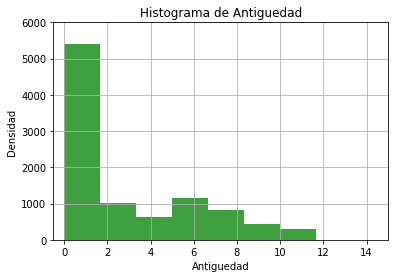

In [23]:
n, bins, patches = plt.hist(x=df['ANTIGUEDAD'].dropna(), bins=12, density=False, color='green', alpha=0.75)
plt.xlabel('Antiguedad')
plt.ylabel('Densidad')
plt.title('Histograma de Antiguedad')
plt.axis([-0.5, 15, 0, 6000])
plt.grid(True)

In [24]:
print('Lista de bins:\n\t{}'.format(list(bins)), '\n')
print('Lista de cantidades:\n\t{}'.format(list(n)))

Lista de bins:
	[0.0, 1.6666666666666667, 3.3333333333333335, 5.0, 6.666666666666667, 8.3333333333333339, 10.0, 11.666666666666668, 13.333333333333334, 15.0, 16.666666666666668, 18.333333333333336, 20.0] 

Lista de cantidades:
	[5391.0, 1016.0, 633.0, 1161.0, 811.0, 424.0, 307.0, 1.0, 1.0, 0.0, 0.0, 1.0]


Se puede obtener lo mismo con el siguiente método de un DataFrame:
```python
df.hist(column=col, bins=12, density=False, color='green', alpha=0.75)
```

In [26]:
??df.hist()

[-0.5, 15, 0, 6000]

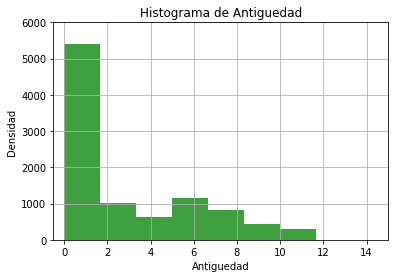

In [29]:
df.hist(column='ANTIGUEDAD', bins=12, density=False, color='green', alpha=0.75)
plt.xlabel('Antiguedad')
plt.ylabel('Densidad')
plt.title('Histograma de Antiguedad')
plt.axis([-0.5, 15, 0, 6000])

#### <font color=#003d5c>1.2. Diagrama de cajas </font>

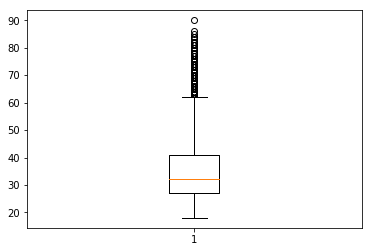

In [30]:
x = plt.boxplot(x=df['EDAD'].dropna())

#### <font color=#003d5c>1.3. Diagrama de barras </font>

#### Graficar la distribución de la variable Target <font color=#28a745>ATTRITION</font> tal como se muestra en la imagen:
La función plt.bar() te permite gaficar la distribución de una variable categórica.
```python
plt.bar(x, height, color='green')
```

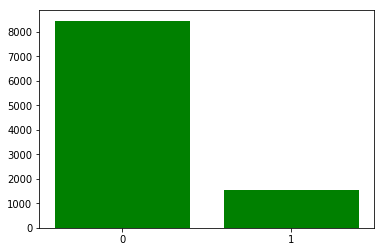

In [35]:
col = 'ATTRITION'
dfCat = df[col].value_counts(normalize=False, dropna=False).reset_index().rename(columns={'index': col, col: 'CNT'})
ind = np.arange(len(dfCat[col]))
bar = plt.bar(x=ind, height=dfCat['CNT'], color='green')
xticks = plt.xticks(ind, dfCat[col])

Para todas las variables categóricas

<div class="alert alert-warning" role="alert">
  <strong>Nota:</strong> Para poder manejar un layout personalizado usaremos el método `plt.subplot2grid()`.
</div>
```python
fig = plt.figure(figsize=(25, 20))
plt.subplot2grid(shape, loc, rowspan, colspan, fig)
```

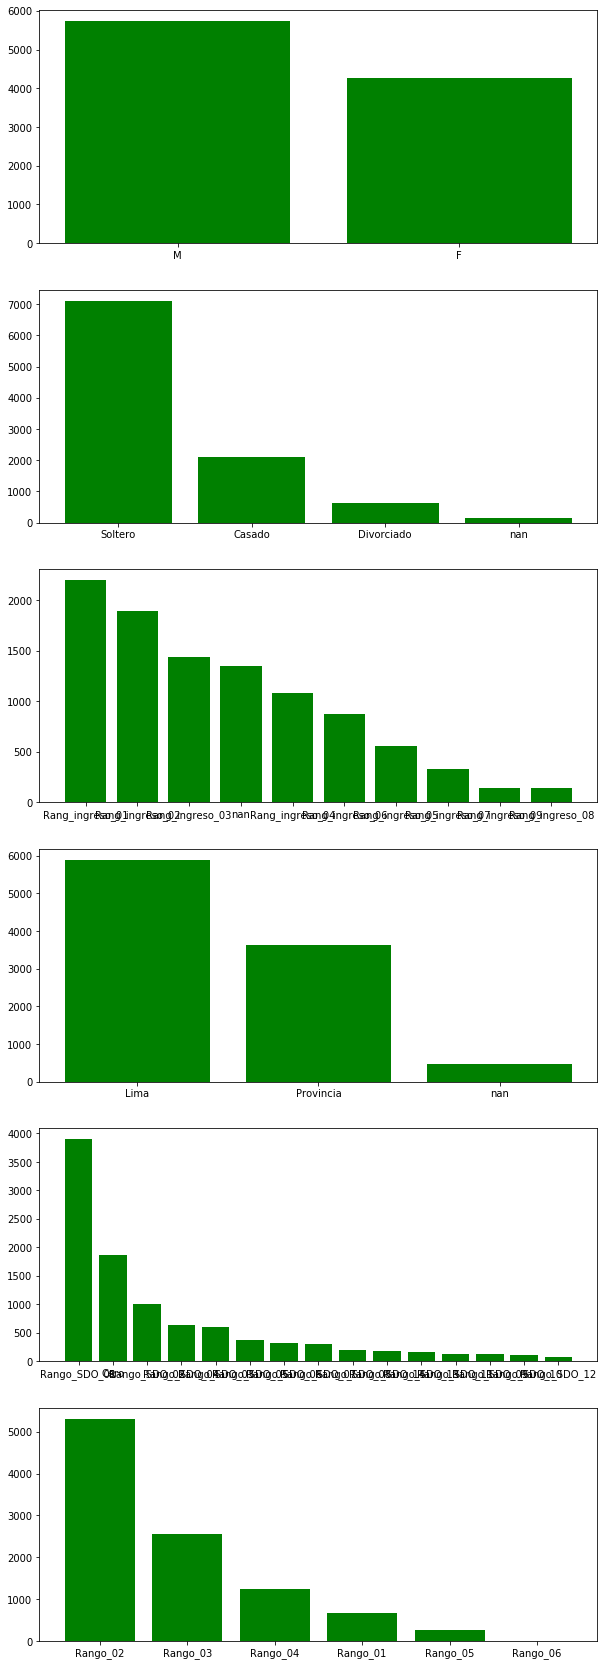

In [33]:
fig, ax = plt.subplots(nrows=len(str_columns), ncols=1, figsize=(10, 30))
for i, col in enumerate(str_columns):
    dfCat = df[col].value_counts(normalize=False, dropna=False).reset_index().rename(columns={'index': col, col: 'CNT'})
    ind = np.arange(len(dfCat[col]))
    bar = ax[i].bar(x=ind, height=dfCat['CNT'], color='green', tick_label=dfCat[col])
    plt.sca(ax[i])

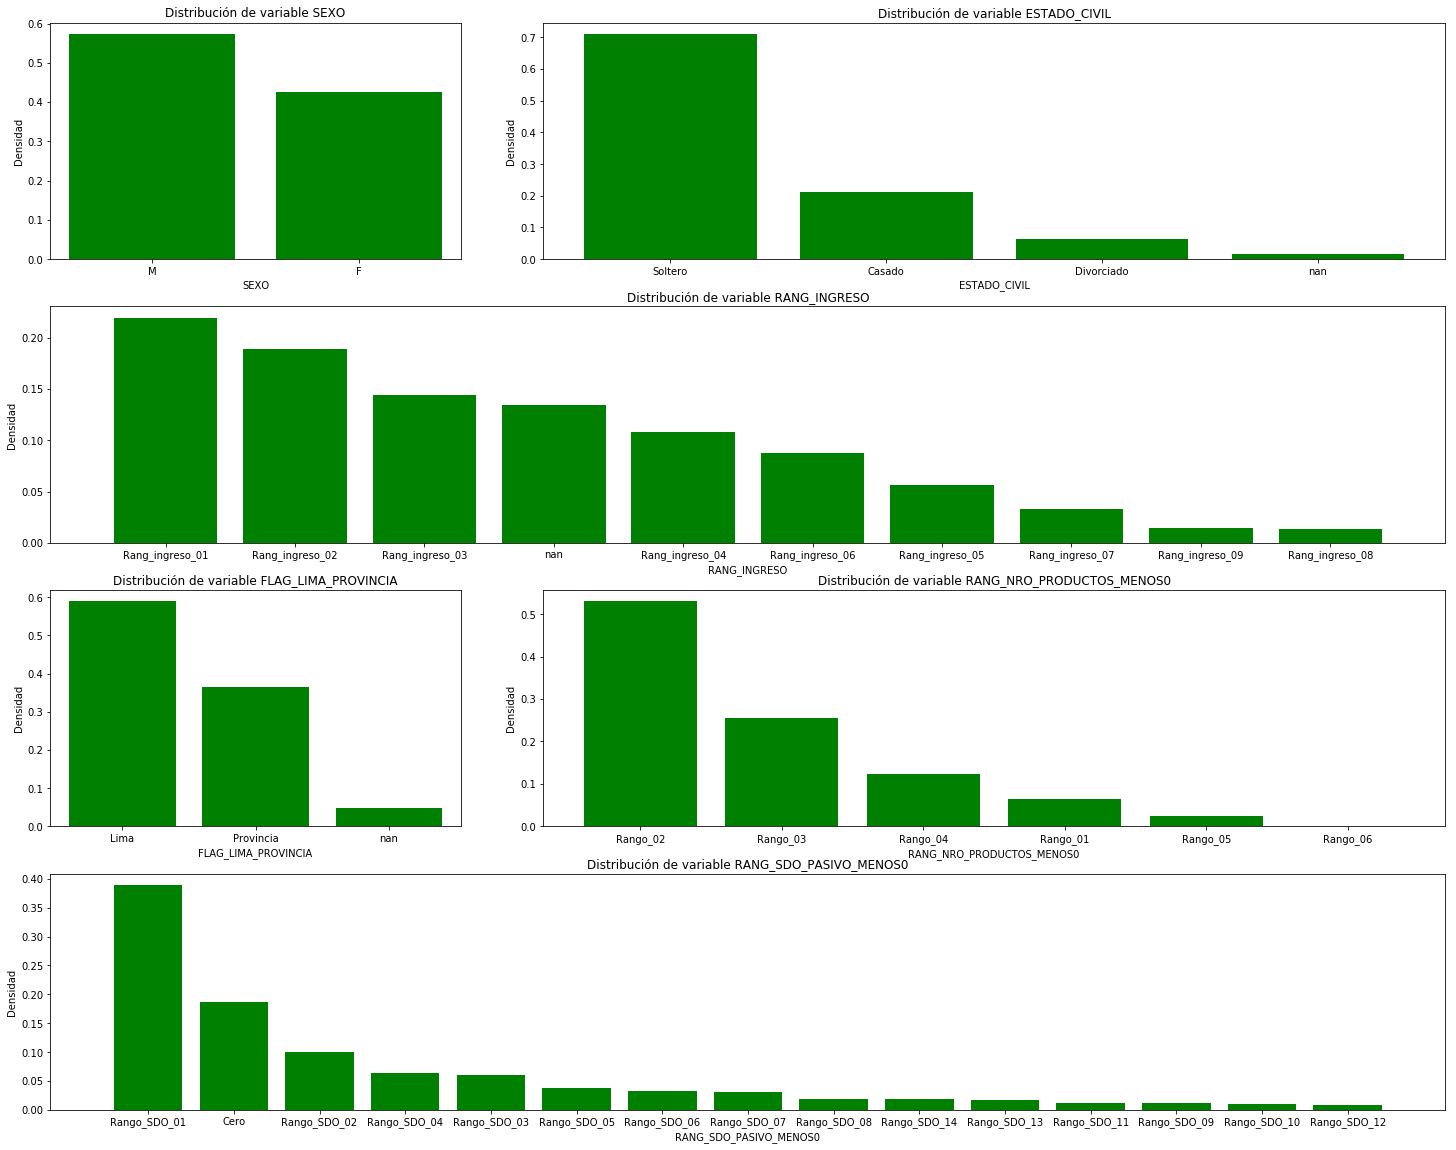

In [34]:
fig = plt.figure(figsize=(25, 20))
ax = [
       plt.subplot2grid((4, 3), (0, 0), colspan=1, fig=fig),
       plt.subplot2grid((4, 3), (0, 1), colspan=2, fig=fig),
       plt.subplot2grid((4, 3), (1, 0), colspan=3, fig=fig),
       plt.subplot2grid((4, 3), (2, 0), colspan=1, fig=fig),
       plt.subplot2grid((4, 3), (3, 0), colspan=3, fig=fig),
       plt.subplot2grid((4, 3), (2, 1), colspan=2, fig=fig),
          ]
for i, col in enumerate(str_columns):
    dfCat = df[col].value_counts(normalize=True, dropna=False).reset_index().rename(columns={'index': col, col: 'CNT'})
    ind = np.arange(len(dfCat[col]))
    bar = ax[i].bar(x=ind, height=dfCat['CNT'], color='green', tick_label=dfCat[col])
    plt.sca(ax[i])
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.title('Distribución de variable {}'.format(col))

#### <font color=#003d5c>1.4. Gráfico Circular </font>


In [39]:
col = 'ATTRITION'
df[col].value_counts(normalize=True, dropna=False).reset_index().rename(columns={'index': col, col: 'CNT'})
#.reset_index().rename(columns={'index': col, col: 'CNT'})

,ATTRITION,CNT
0,0,0.8447
1,1,0.1553


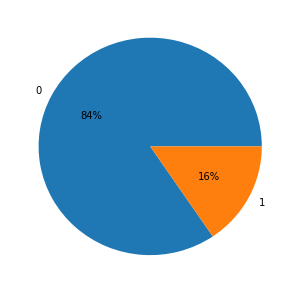

In [43]:
col = 'ATTRITION'
dfCat = df[col].value_counts(normalize=True, dropna=False).reset_index().rename(columns={'index': col, col: 'CNT'})
ind = np.arange(len(dfCat[col]))
fig = plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(dfCat['CNT'], labels=dfCat[col], shadow=False, autopct='%.0f%%')

In [45]:
str_columns

['SEXO',
 'ESTADO_CIVIL',
 'RANG_INGRESO',
 'FLAG_LIMA_PROVINCIA',
 'RANG_SDO_PASIVO_MENOS0',
 'RANG_NRO_PRODUCTOS_MENOS0']

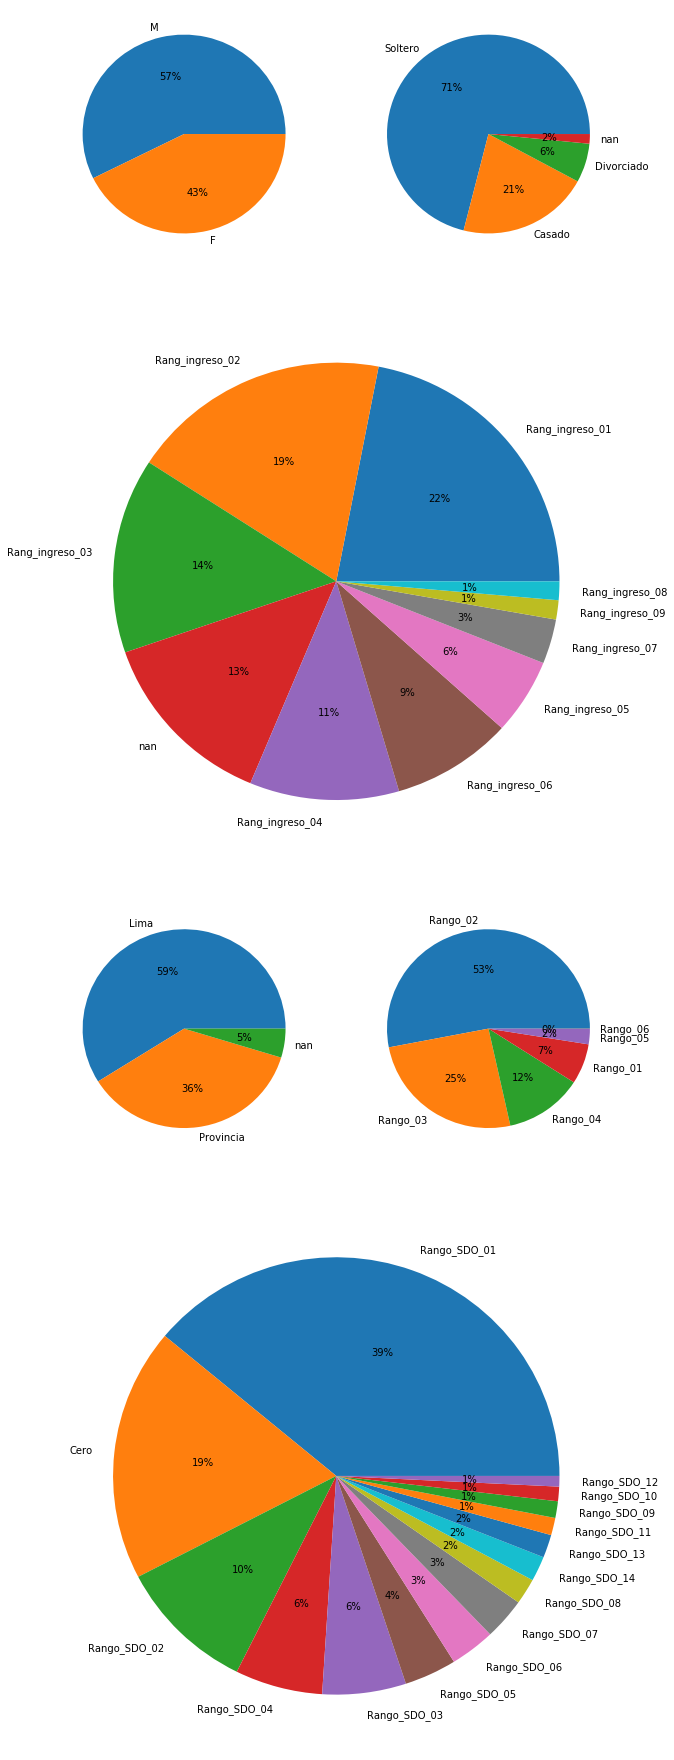

In [44]:
fig = plt.figure(figsize=(10, 32))
ax = [
       plt.subplot2grid((6, 2), (0, 0), colspan=1, fig=fig),
       plt.subplot2grid((6, 2), (0, 1), colspan=1, fig=fig),
       plt.subplot2grid((6, 2), (1, 0), colspan=2, rowspan=2, fig=fig),
       plt.subplot2grid((6, 2), (3, 0), colspan=1, fig=fig),
       plt.subplot2grid((6, 2), (4, 0), colspan=2, rowspan=2, fig=fig),
       plt.subplot2grid((6, 2), (3, 1), colspan=1, fig=fig),
          ]
for i, col in enumerate(str_columns):
    dfCat = df[col].value_counts(normalize=True, dropna=False).reset_index().rename(columns={'index': col, col: 'CNT'})
    ind = np.arange(len(dfCat[col]))
    patches, texts, autotexts = ax[i].pie(dfCat['CNT'], labels=dfCat[col], shadow=False, autopct='%.0f%%')

#### <font color=#003d5c>1.5. Scatter Plots </font>

[-0.5, 15, 15, 90]

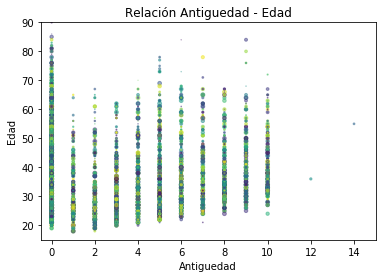

In [46]:
N = len(df['ANTIGUEDAD'])
colors = np.random.rand(N)
area = (4 * np.random.rand(N))**2
plt.scatter(df['ANTIGUEDAD'], df['EDAD'], s=area, c=colors, alpha=0.5)
plt.xlabel('Antiguedad')
plt.ylabel('Edad')
plt.title('Relación Antiguedad - Edad')
plt.axis([-0.5, 15, 15, 90])
#plt.grid(True)

#### <font color=#003d5c>1.6. Ratios de Efectividad </font>

In [47]:
import matplotlib.patches as mpatches

In [48]:
dfRatio = df.groupby(pd.qcut(df['EDAD'], 10)).agg({'ATTRITION':'mean', 'ID_CORRELATIVO':'count'}).reset_index()

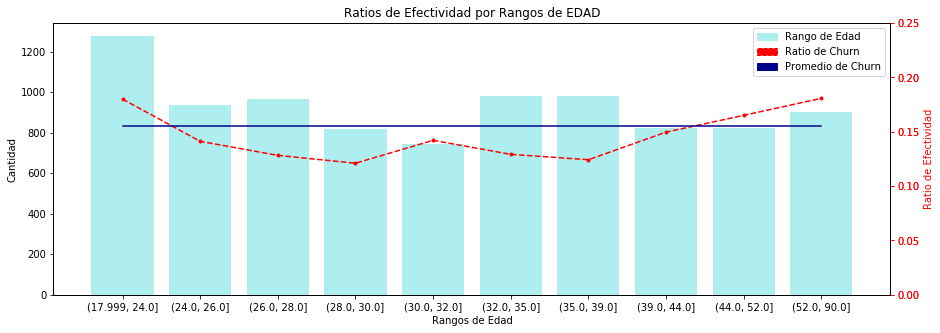

In [49]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ind = np.arange(len(dfRatio['EDAD']))
b = plt.bar(x=ind, height=dfRatio['ID_CORRELATIVO'], color='paleturquoise', tick_label=dfRatio['EDAD'])
ax1.set_xlabel('Rangos de Edad')
ax1.set_ylabel('Cantidad')
ax1.tick_params('both')
ax2 = ax1.twinx()
r = ax2.plot(ind, dfRatio['ATTRITION'], 'r.--')
ax2.set_ylabel('Ratio de Efectividad', color='r')
ax2.tick_params('y', colors='r')
yaxis = ax2.axis(ymin=0, ymax=0.25)
title = plt.title('Ratios de Efectividad por Rangos de EDAD')
ax3 = ax1.twinx()
a = ax3.plot(ind, [df['ATTRITION'].mean()] * len(dfRatio['EDAD']),'-', color='darkblue')
yaxis = ax3.axis(ymin=0, ymax=0.25)
ax3.tick_params('y', colors='r')
edad_patch = mpatches.Patch(color='paleturquoise', label='Rango de Edad')
ratio_patch = mpatches.Patch(color='red', label='Ratio de Churn', linestyle='--')
average_patch = mpatches.Patch(color='darkblue', label='Promedio de Churn', linestyle='-')
legend = plt.legend(handles=[edad_patch, ratio_patch, average_patch])

#### Importar la segunda librería necesaria para la visualización de datos:
### <font color=#003d5c>2. Seaborn</font>
<img src="../img/seaborn_plots.png" />
```python
import seaborn as sns
```

In [50]:
import seaborn as sns

#### <font color=#003d5c>2.1. Histograma </font>
Un histograma representa la distribución de datos formando contenedores a lo largo del rango de los datos y luego dibujando barras para mostrar el número de observaciones que caen en cada contenedor.

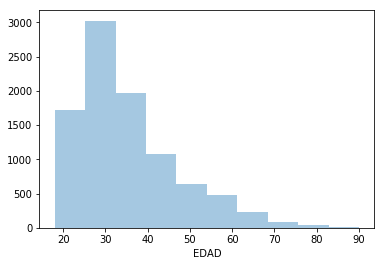

In [54]:
ax = sns.distplot(df['EDAD'].dropna(), bins=10, kde=False, rug=False)

<div class="alert alert-warning" role="alert">
  <strong>Nota:</strong> Al dibujar histogramas, la opción principal que tiene es la cantidad de bandejas que se deben usar y dónde ubicarlas. `distplot ()` usa una regla simple para adivinar cuál es el número correcto de forma predeterminada, pero al intentar más o menos ubicaciones puede revelar otras características en los datos.
</div>

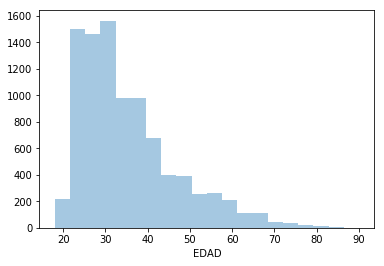

In [55]:
ax = sns.distplot(df['EDAD'].dropna(), bins=20, kde=False, rug=False)

<div class="alert alert-info" role="alert">
  <strong>Info Adicional:</strong> La estimación de la densidad del núcleo (KDE) puede ser menos familiar, pero puede ser una herramienta útil para trazar la forma de una distribución. Al igual que el histograma, las representaciones de KDE codifican la densidad de las observaciones en un eje con la altura a lo largo del otro eje.
</div>

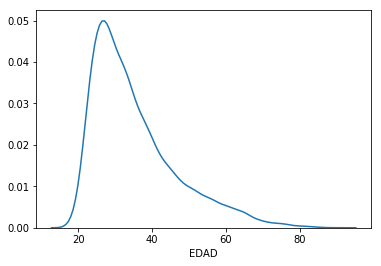

In [57]:
ax = sns.distplot(df['EDAD'].dropna(),  hist=False, rug=False)

In [75]:
#categorias_ingreso_lista = df['RANG_INGRESO'].unique().tolist()
#len(categorias_ingreso_lista)
categorias_ingreso_lista

['Rang_ingreso_01',
 'Rang_ingreso_02',
 'Rang_ingreso_03',
 'Rang_ingreso_07',
 'Rang_ingreso_09',
 'Rang_ingreso_05',
 'Rang_ingreso_06',
 'Rang_ingreso_04',
 'Rang_ingreso_08']

In [74]:
#[c for c in categorias_ingreso_lista if c not in ['nan']]
categorias_ingreso_lista.remove(np.nan)

Rang_ingreso_01
Rang_ingreso_02
Rang_ingreso_03
Rang_ingreso_07
Rang_ingreso_09
Rang_ingreso_05
Rang_ingreso_06
Rang_ingreso_04
Rang_ingreso_08


[-0.5, 100, 0, 0.06]

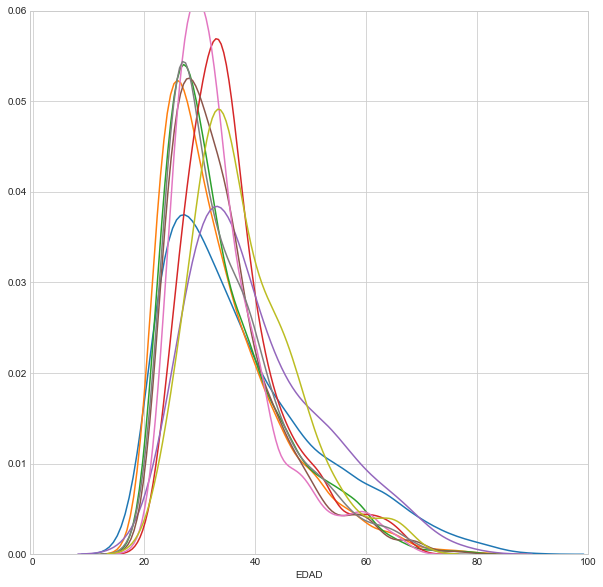

In [82]:
#categorias_ingreso_lista = df['RANG_INGRESO'].unique().tolist()
#fig, ax = plt.subplots(nrows=len(categorias_ingreso_lista), ncols=1, figsize=(10,10))
fig = plt.figure(figsize=(10, 10))
for i, col in enumerate(categorias_ingreso_lista):
    print(col)
    dfTemp = df.loc[df['RANG_INGRESO'] == col, :]
    sns.distplot(dfTemp['EDAD'].dropna(),  hist=False, rug=False)
plt.axis([-0.5, 100, 0, 0.06])

#### <font color=#003d5c>1.2. Diagrama de cajas </font>

In [58]:
sns.set_style("whitegrid")

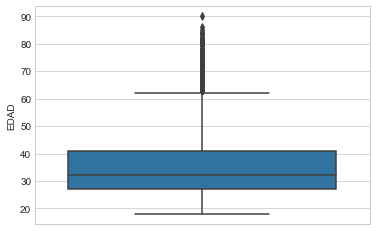

In [61]:
ax = sns.boxplot(y=df['EDAD'])

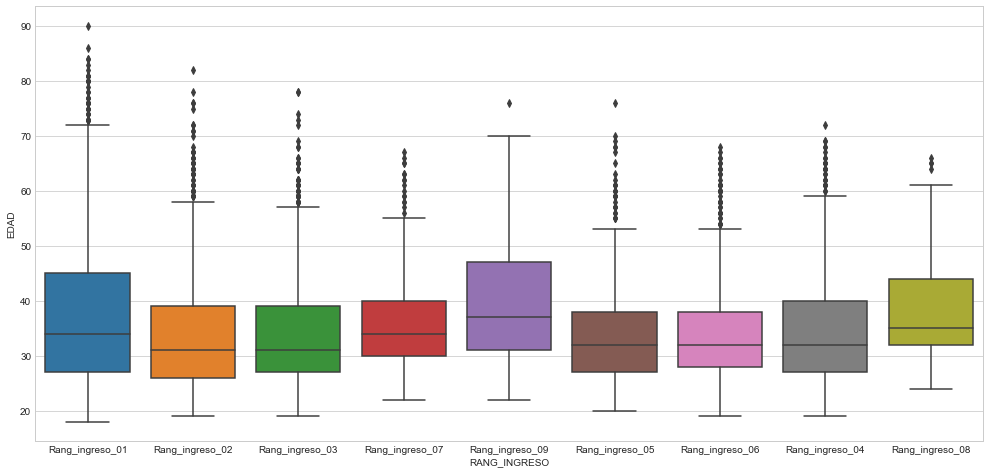

In [62]:
fig = plt.figure(figsize=(17, 8))
ax = sns.boxplot(x="RANG_INGRESO", y="EDAD", data=df)

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = sns.boxplot(x="RANG_INGRESO", y="EDAD", hue="ATTRITION", data=df, palette="Set3")

#### <font color=#003d5c>2.3. Diagrama de barras </font>

In [ ]:
from numpy import mean, count_nonzero, std

In [83]:
pd.__version__

'0.20.3'

In [ ]:
fig = plt.figure(figsize=(15, 5))
g = sns.barplot(x="RANG_INGRESO", y="ATTRITION", data=df, estimator=mean)

#### <font color=#003d5c>2.4. Gráfico Circular </font>

#### <font color=#003d5c>2.5. Scatter Plots </font>

In [ ]:
g = sns.pairplot(df.dropna(), hue="ATTRITION")

#### <font color=#003d5c>2.6. Ratios de Efectividad </font>

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(x="RANG_INGRESO", data=df, palette="GnBu_d")
ax1 = ax.twinx()
g = sns.pointplot(x="RANG_INGRESO", y="ATTRITION", data=df, markers=["o"], linestyles=["--"], color='red', ax=ax1, ci=None)

In [ ]:
df['RANGO_EDAD_DECIL'] = pd.qcut(df['EDAD'], 10)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(x="RANGO_EDAD_DECIL", data=df, palette="GnBu_d")
ax1 = ax.twinx()
g = sns.pointplot(x="RANGO_EDAD_DECIL", y="ATTRITION", data=df, markers=["o"], linestyles=["--"], color='red', ax=ax1, ci=None)
#yaxis = ax1.axis(ymin=0, ymax=0.20)
g = plt.plot(range(len(df['RANGO_EDAD_DECIL'].unique()) - 1),(len(df['RANGO_EDAD_DECIL'].unique()) - 1) * [df['ATTRITION'].mean()], '-g')

#### <font color=#003d5c>2.7. Mapa de Calor</font>

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), linewidths=1.5)

#### Importar la tercera librería necesaria para la visualización de datos:
### <font color=#003d5c>3. Plotly</font>
<img src="../img/plotly_logo.png" />
```python
import plotly.plotly as py
```

In [ ]:
import plotly.plotly as py

#### <font color=#003d5c>3.1. Histograma </font>
Un histograma representa la distribución de datos formando contenedores a lo largo del rango de los datos y luego dibujando barras para mostrar el número de observaciones que caen en cada contenedor.

In [ ]:
import plotly.graph_objs as go

In [ ]:
data = [go.Histogram(x=df['EDAD'].dropna(), histnorm='probability')]
py.iplot(data, filename='Histograma de la variable EDAD')

In [ ]:
trace1 = go.Histogram(
    x=df.loc[df['ATTRITION'] == 0, 'EDAD'].dropna(),
    opacity=0.75,
    name='Attrition 0',
    xbins=dict(
        start=0,
        end=70,
        size=0.5
    ),
    marker=dict(
        color='#5bc0de',
    ),
)
trace2 = go.Histogram(
    x=df.loc[df['ATTRITION'] == 1, 'EDAD'].dropna(),
    opacity=0.75,
    name='Attrition 1',
    xbins=dict(
        start=0,
        end=70,
        size=0.5
    )    
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title='Histograma de la variable EDAD',
                    xaxis=dict(
                        title='Edad'
                    ),
                    yaxis=dict(
                        title='Count'
                    ))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='histograma EDAD')

In [ ]:
col = 'RANG_INGRESO'
dfCat = df[col].value_counts(normalize=True, dropna=False).reset_index().rename(columns={'index': col, col: 'CNT'})
fig = {
  "data": [
    {
      "values": dfCat['CNT'].tolist(),
      "labels": dfCat[col].tolist(),
      #"domain": {"x": [.52, 1]},
      "name": "Sexo",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Distribución de variables SEXO",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "SEXO",
                #"x": 0.8,
                #"y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [ ]:
# boxplot, countplot, histogram, piechart, correlation_matrix (metric types), heatmap (null counts), Scatterplot Matrix 

# <font color=#003d5c>3.2 Preprocesamiento de Datos</font>


### 3.2.1. Formateo

In [ ]:
# astype, pd.to_numeric (optimizacion), 

### 3.2.2. Limpieza

In [ ]:
# Imputacion (https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

# <font color=#003d5c>3.3 Feature Engineering</font>


### 3.3.1. Estandarización

In [ ]:
# Scala, Normalización, 

### 3.3.2. Descomposición

In [ ]:
# Creatividad 

### 3.3.3. Agregación

# <font color=#003d5c>3.4 Ejercicio Práctico</font>
